In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные вылаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых rлиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [86]:
data = pd.read_csv('vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

In [87]:
### Посмотрим на некатегориальные колонки

numeric_columns = data.loc[:,data.dtypes!=np.object].columns
data.loc[:,data.dtypes!=np.object].head(2)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,44,1,28.0,0,40454.0,26.0,217,1
1,76,1,3.0,0,33536.0,26.0,183,0


In [88]:
### Посмотрим на категориальные колонки

categorical_columns = data.loc[:,data.dtypes==np.object].columns
data.loc[:,data.dtypes==np.object].head(2)

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No


In [89]:
### Your code is here
### Построим матрицу корреляций признаков между собой и с таргетом

data[numeric_columns].corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.081323,0.030638,-0.261456,0.081564,-0.576066,0.000030,0.113888
Driving_License,-0.081323,1.000000,0.004926,0.020464,-0.014338,0.044335,0.002704,0.011263
Region_Code,0.030638,0.004926,1.000000,-0.021270,-0.012213,-0.039733,-0.008527,0.010230
Previously_Insured,-0.261456,0.020464,-0.021270,1.000000,-0.005164,0.224719,0.022350,-0.333502
Annual_Premium,0.081564,-0.014338,-0.012213,-0.005164,1.000000,-0.123851,-0.008878,0.029839
Policy_Sales_Channel,-0.576066,0.044335,-0.039733,0.224719,-0.123851,1.000000,-0.006131,-0.146421
Vintage,0.000030,0.002704,-0.008527,0.022350,-0.008878,-0.006131,1.000000,-0.007187
Response,0.113888,0.011263,0.010230,-0.333502,0.029839,-0.146421,-0.007187,1.000000


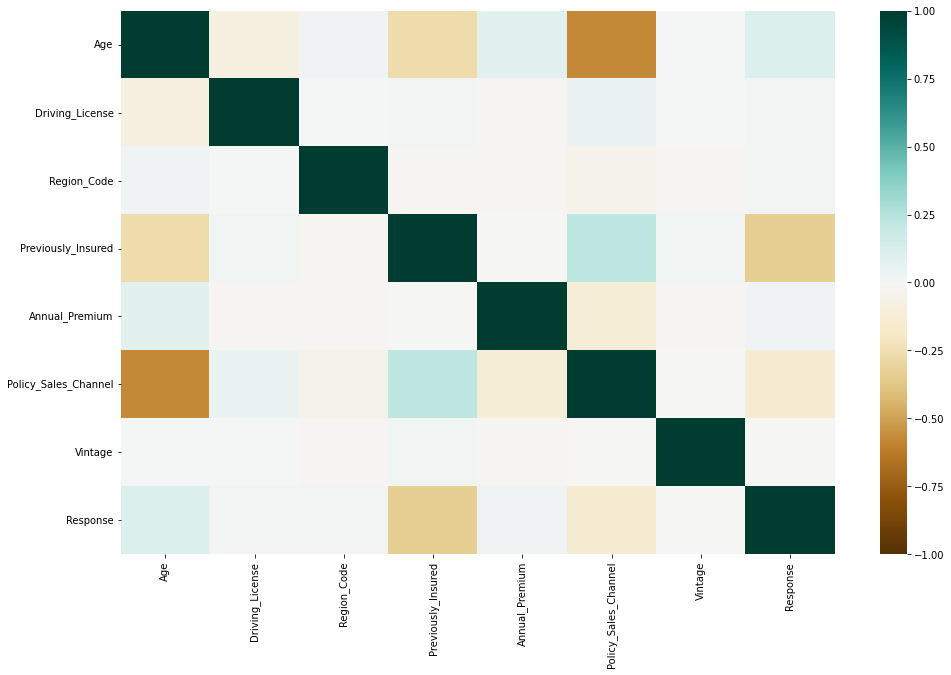

In [90]:
### Изобразим в виде Тепловой карты

import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(data[numeric_columns].corr(), 
            xticklabels=numeric_columns,
            yticklabels=numeric_columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [91]:
### Посмотрим на квазиконстантые признаки

from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(data[numeric_columns])

cutter.get_feature_names_out()

array(['Age', 'Region_Code', 'Previously_Insured', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'], dtype=object)

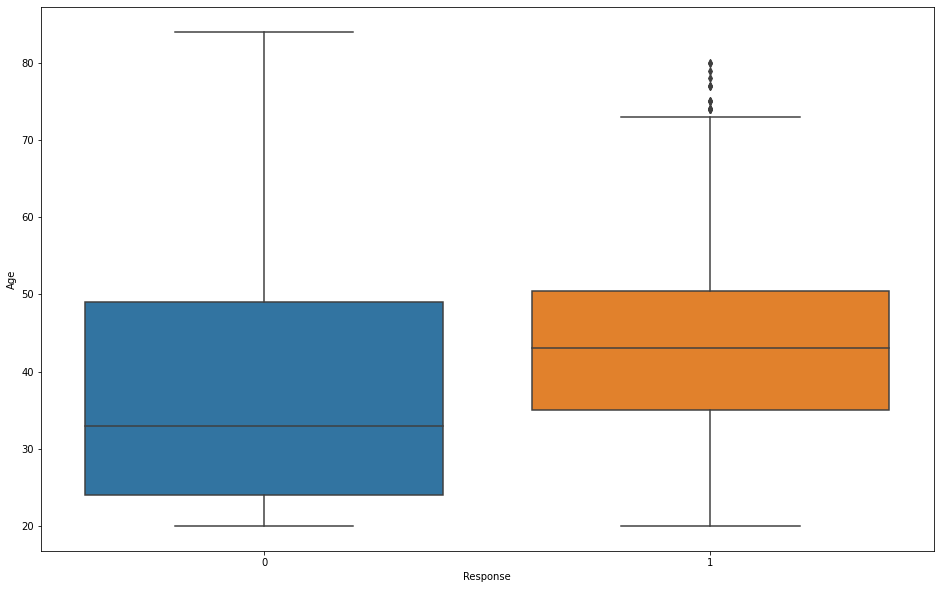

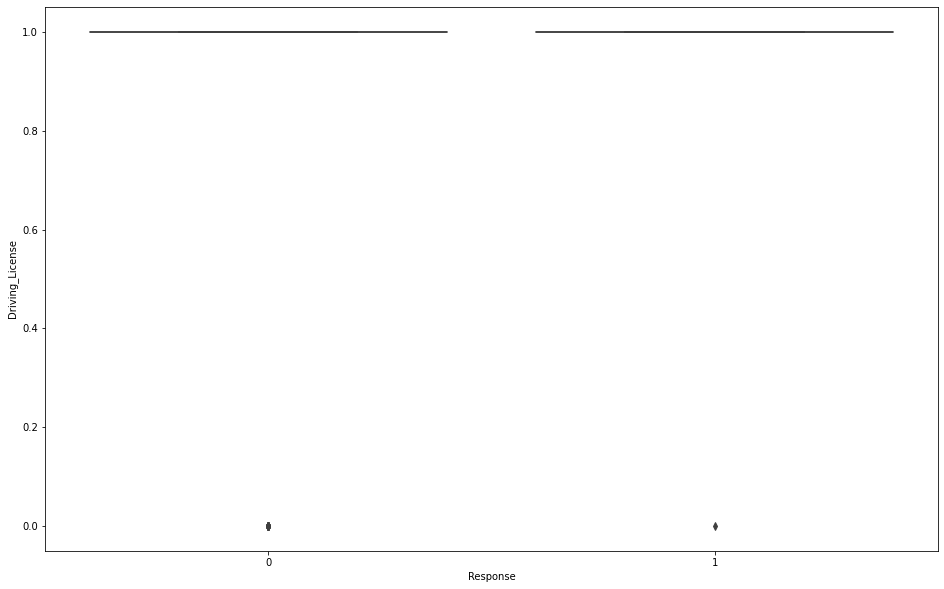

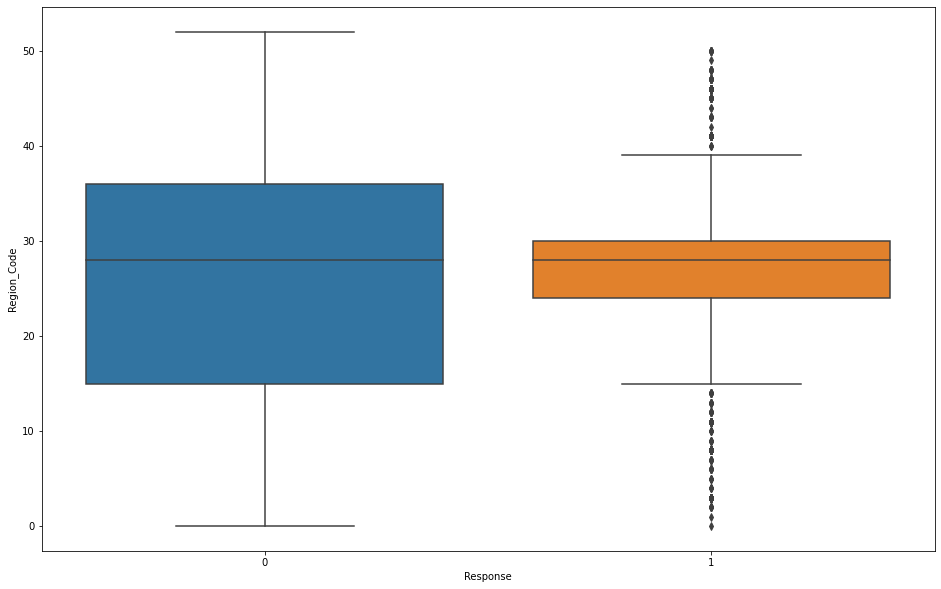

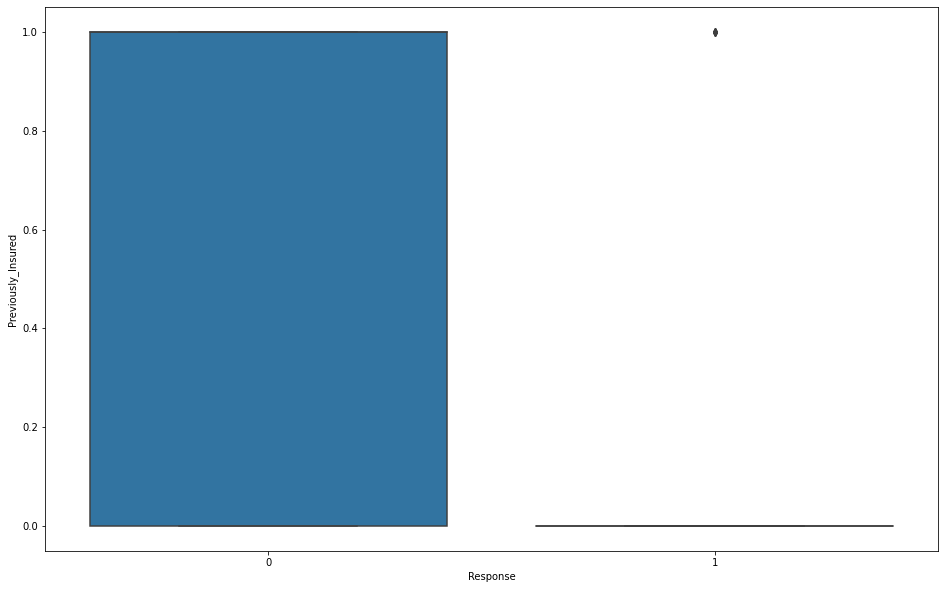

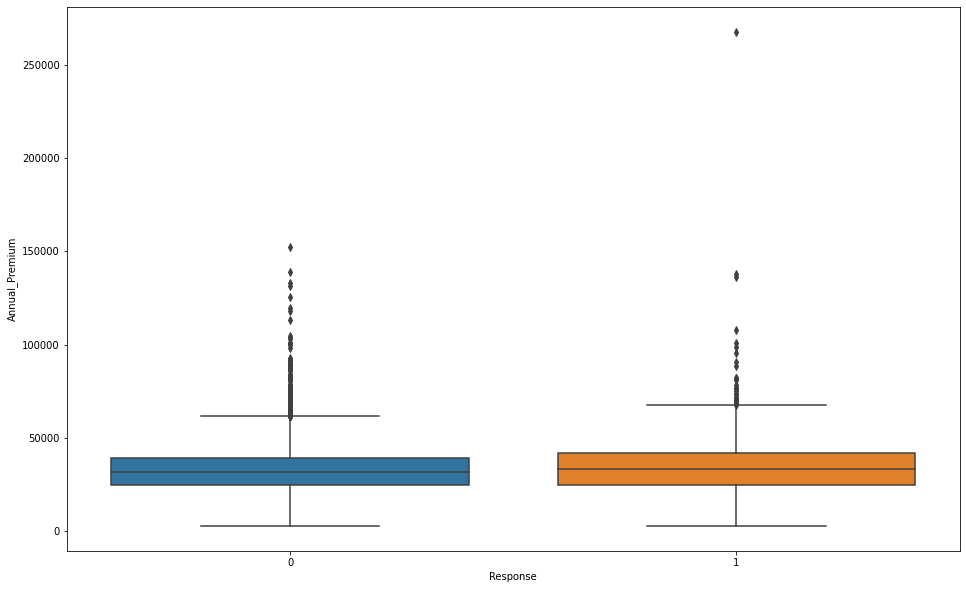

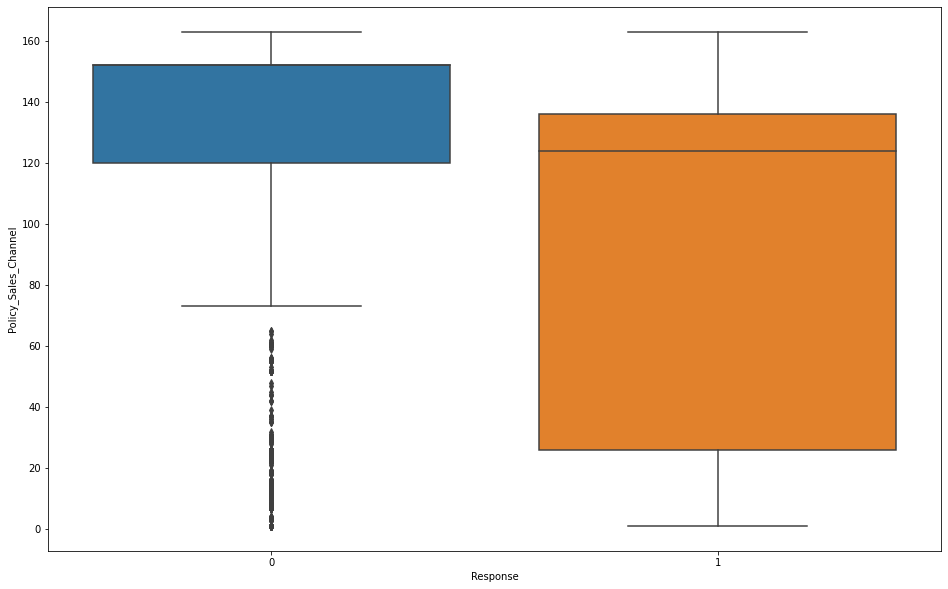

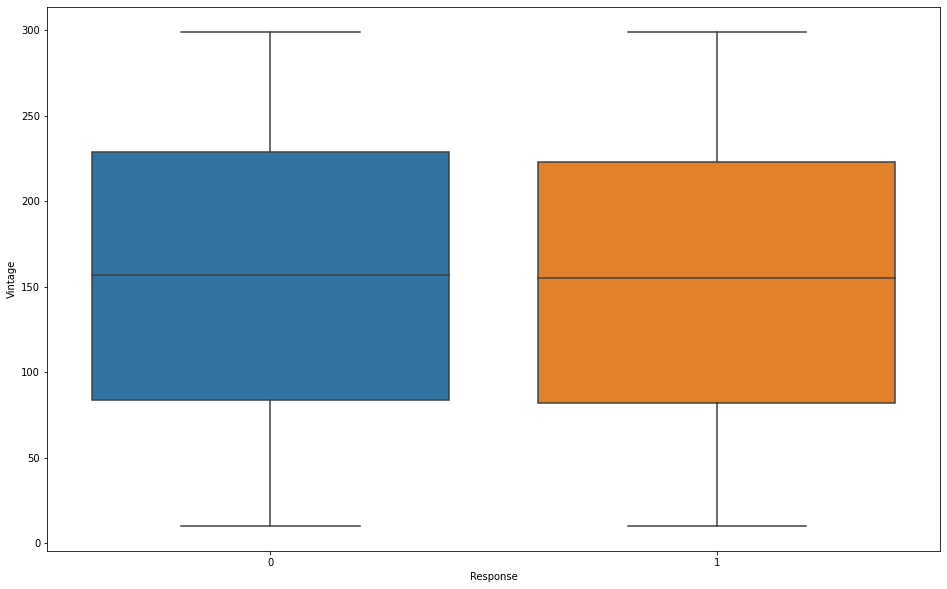

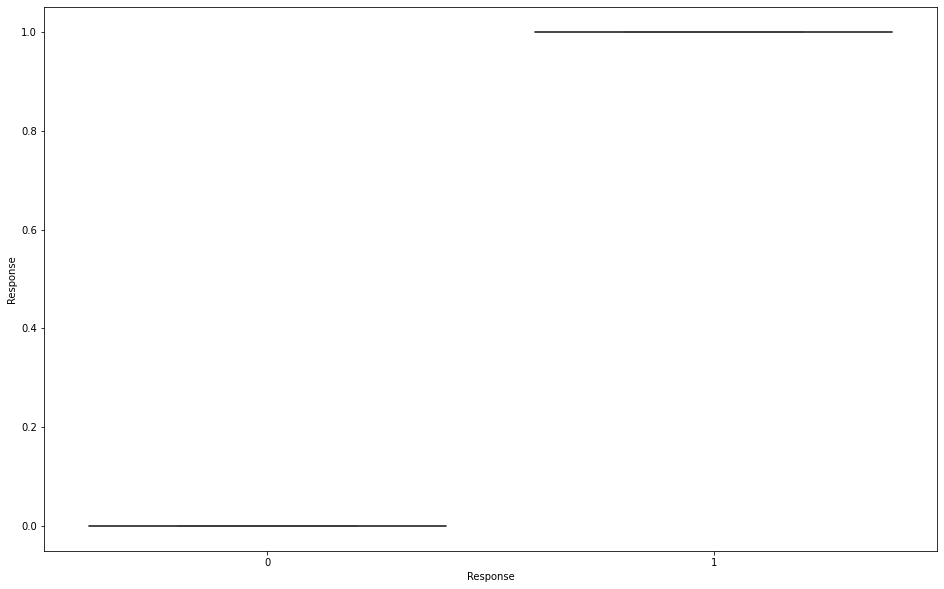

In [92]:
### Еще один способ, как в задаче классификации без построения модели
### оценить важность вещественных признаков- с помощью ящиков с усами!
### Только теперь немного "наоборот", представляя таргет как категорию
### А значения, распределение которых хотим сравнивать, окажутся нашими фичами


for col in numeric_columns:
    
    fig = plt.figure()
    fig.set_size_inches(16, 10)
    
    sns.boxplot(y=col, x=data['Response'].astype('category'), data=data)
    
    plt.show()

In [93]:
#Баланс классов
data["Response"].value_counts()

0    8753
1    1247
Name: Response, dtype: int64

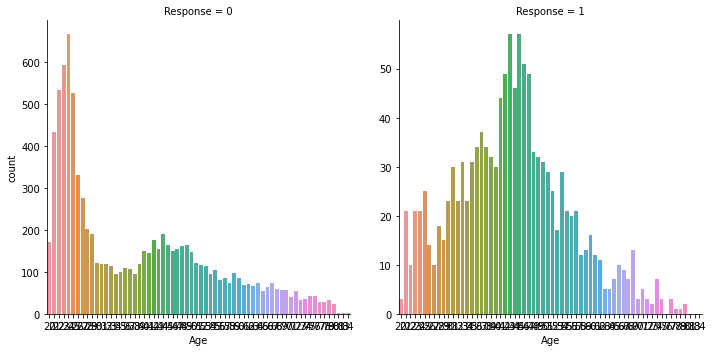

In [94]:
#распределение возраста транспортного средства в зависимости от response
sns.catplot(x="Age", kind='count', col="Response", data=data, sharey=False)

In [95]:
#Закодируйте признаки типа object с помощью one-hot кодирования
for col in categorical_columns:
    one_hot = pd.get_dummies(data[col], prefix=col, drop_first=True)
    data = pd.concat((data.drop(col, axis=1), one_hot), axis=1)

**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

### Your code is here
### Обучим градиентный бустинг над деревьями

model = GradientBoostingClassifier(learning_rate=1,
                                   random_state = 1, 
                                   n_estimators = 100)

model.fit(X_train,y_train)


GradientBoostingClassifier(learning_rate=1, random_state=1)

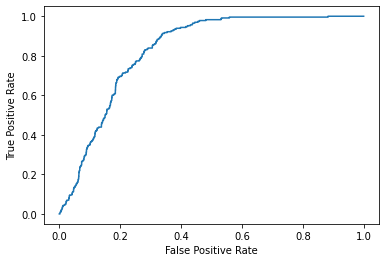

In [14]:
### Получим всевозможные пары FPR, TPR 
### И нарисуем ROC-кривую

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [15]:
### Посчитаем ROC-AUC

from sklearn.metrics import auc

auc(fpr, tpr)

0.828168754605748

In [16]:
### Precision / Recall / F-мера

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


print(f'Accuracy равно: {accuracy_score(y_test, model.predict(X_test)):.3f}' )

print(f'Precision равно: {precision_score(y_test, model.predict(X_test)):.3f}' )

print(f'Recall равно: {recall_score(y_test, model.predict(X_test)):.3f}' )

print(f'F-мера равно: {f1_score(y_test, model.predict(X_test)):.3f}' )

Accuracy равно: 0.852
Precision равно: 0.311
Recall равно: 0.239
F-мера равно: 0.270


**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [17]:
### Задаем сетку параметров

n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

In [18]:
### Your code is here

test_f1_score = []
lr=[]
n_e=[]
for l in learning_rate_list:
    for n in n_estimators_list:
    
        model.n_estimators = n
        model.learning_rate=l

        model.fit(X_train,y_train)

        test_f1_score.append(f1_score(y_test, model.predict(X_test), average="weighted"))
        lr.append(l)
        n_e.append(n)
d={"test_f1_score":test_f1_score,"learning_rate":lr,"n_estimators":n_e}
df = pd.DataFrame(d)

In [19]:
df

,test_f1_score,learning_rate,n_estimators
0,0.831627,1.00,5
1,0.838842,1.00,10
2,0.841775,1.00,20
3,0.841602,1.00,50
4,0.842926,1.00,100
5,0.840530,1.00,200
6,0.842988,1.00,700
7,0.841267,1.00,1000
8,0.830759,0.10,5
9,0.830759,0.10,10


<AxesSubplot:xlabel='n_estimators', ylabel='learning_rate'>

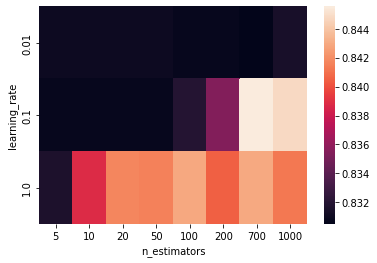

In [20]:
df_1 = df.pivot("learning_rate","n_estimators", "test_f1_score")
ax = sns.heatmap(df_1)
ax

In [21]:
df["test_f1_score"].max()

0.8455443439122964

**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

In [36]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]


### Your code is here

model0 = RandomForestClassifier(max_depth=5)

#model1 = RandomForestClassifier(max_depth=5000)


model0_f1_score = []
n_e=[]
for n in n_estimators_list:
    model0.n_estimators = n
    model0.fit(X_train,y_train)
    model0_f1_score.append(f1_score(y_test, model0.predict(X_test), average="weighted"))
    n_e.append(n)
d={"model0_f1_score":model0_f1_score,"n_estimators":n_e}
df0 = pd.DataFrame(d)

In [37]:
model0 = RandomForestClassifier(max_depth=5000)

#model1 = RandomForestClassifier(max_depth=5000)


model0_f1_score = []
n_e=[]
for n in n_estimators_list:
    model0.n_estimators = n
    model0.fit(X_train,y_train)
    model0_f1_score.append(f1_score(y_test, model0.predict(X_test), average="weighted"))
    n_e.append(n)
d={"model0_f1_score":model0_f1_score,"n_estimators":n_e}
df1 = pd.DataFrame(d)

In [38]:
model0 = GradientBoostingClassifier(max_depth=5)

#model1 = RandomForestClassifier(max_depth=5000)


model0_f1_score = []
n_e=[]
for n in n_estimators_list:
    model0.n_estimators = n
    model0.fit(X_train,y_train)
    model0_f1_score.append(f1_score(y_test, model0.predict(X_test), average="weighted"))
    n_e.append(n)
d={"model0_f1_score":model0_f1_score,"n_estimators":n_e}
df2 = pd.DataFrame(d)

In [39]:
model0 = GradientBoostingClassifier(max_depth=5000)

#model1 = RandomForestClassifier(max_depth=5000)


model0_f1_score = []
n_e=[]
for n in n_estimators_list:
    model0.n_estimators = n
    model0.fit(X_train,y_train)
    model0_f1_score.append(f1_score(y_test, model0.predict(X_test), average="weighted"))
    n_e.append(n)
d={"model0_f1_score":model0_f1_score,"n_estimators":n_e}
df3 = pd.DataFrame(d)

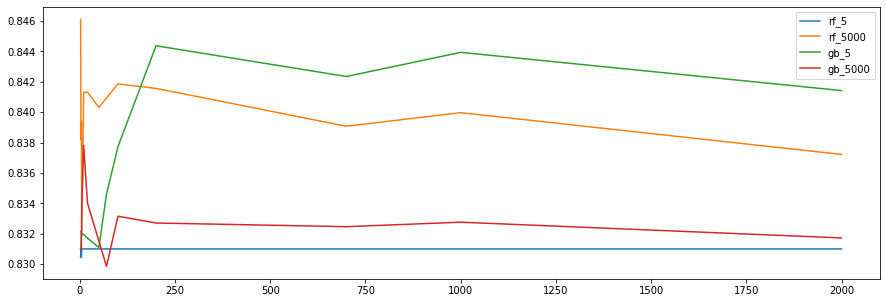

In [53]:
# fig = plt.figure()
# fig.set_size_inches(15, 5)

# ax_1 = fig.add_subplot(1, 2, 1)
# plt.plot(x=df.n_estimators,y=df.model0_f1_score, ax=ax_1)

#df.plot(kind='line',x='name',y='num_children',ax=ax)

fig = plt.figure()
fig.set_size_inches(15, 5)

ax_1 = fig.add_subplot()
plt.plot(df0.n_estimators, df0.model0_f1_score, label='rf_5')

ax_2 = fig.add_subplot()
plt.plot(df1.n_estimators, df1.model0_f1_score, label='rf_5000')

ax_3 = fig.add_subplot()
plt.plot(df2.n_estimators, df2.model0_f1_score, label='gb_5')

ax_4 = fig.add_subplot()
plt.plot(df3.n_estimators, df3.model0_f1_score, label='gb_5000')
plt.legend()
plt.show()

**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [75]:
categorical_columns = data.loc[:,data.dtypes==np.object].columns
categorical_columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [76]:
from catboost import CatBoostClassifier

### Your code is here
model = CatBoostClassifier()
model.fit(X_train,y_train, cat_features=['Gender', 'Vehicle_Age', 'Vehicle_Damage'])

Learning rate set to 0.025035
0:	learn: 0.6524209	total: 164ms	remaining: 2m 43s
1:	learn: 0.6213114	total: 187ms	remaining: 1m 33s
2:	learn: 0.5922961	total: 219ms	remaining: 1m 12s
3:	learn: 0.5658834	total: 249ms	remaining: 1m 1s
4:	learn: 0.5423457	total: 265ms	remaining: 52.7s
5:	learn: 0.5180857	total: 280ms	remaining: 46.4s
6:	learn: 0.4986798	total: 295ms	remaining: 41.9s
7:	learn: 0.4802832	total: 310ms	remaining: 38.4s
8:	learn: 0.4619128	total: 332ms	remaining: 36.6s
9:	learn: 0.4465202	total: 349ms	remaining: 34.5s
10:	learn: 0.4341692	total: 366ms	remaining: 32.9s
11:	learn: 0.4204912	total: 383ms	remaining: 31.6s
12:	learn: 0.4147382	total: 407ms	remaining: 30.9s
13:	learn: 0.4094293	total: 438ms	remaining: 30.8s
14:	learn: 0.3996664	total: 454ms	remaining: 29.8s
15:	learn: 0.3902804	total: 485ms	remaining: 29.8s
16:	learn: 0.3851970	total: 500ms	remaining: 28.9s
17:	learn: 0.3768978	total: 515ms	remaining: 28.1s
18:	learn: 0.3694314	total: 531ms	remaining: 27.4s
19:	lear

168:	learn: 0.2653705	total: 2.93s	remaining: 14.4s
169:	learn: 0.2651567	total: 2.95s	remaining: 14.4s
170:	learn: 0.2650380	total: 2.96s	remaining: 14.4s
171:	learn: 0.2649261	total: 2.98s	remaining: 14.3s
172:	learn: 0.2647970	total: 3.01s	remaining: 14.4s
173:	learn: 0.2646680	total: 3.03s	remaining: 14.4s
174:	learn: 0.2645217	total: 3.04s	remaining: 14.3s
175:	learn: 0.2643907	total: 3.06s	remaining: 14.3s
176:	learn: 0.2643332	total: 3.09s	remaining: 14.4s
177:	learn: 0.2642500	total: 3.1s	remaining: 14.3s
178:	learn: 0.2641025	total: 3.13s	remaining: 14.4s
179:	learn: 0.2639986	total: 3.17s	remaining: 14.4s
180:	learn: 0.2638472	total: 3.18s	remaining: 14.4s
181:	learn: 0.2638400	total: 3.19s	remaining: 14.3s
182:	learn: 0.2637431	total: 3.2s	remaining: 14.3s
183:	learn: 0.2636109	total: 3.22s	remaining: 14.3s
184:	learn: 0.2635469	total: 3.25s	remaining: 14.3s
185:	learn: 0.2634676	total: 3.26s	remaining: 14.3s
186:	learn: 0.2634578	total: 3.27s	remaining: 14.2s
187:	learn: 0.

329:	learn: 0.2526588	total: 5.86s	remaining: 11.9s
330:	learn: 0.2525618	total: 5.87s	remaining: 11.9s
331:	learn: 0.2524847	total: 5.89s	remaining: 11.8s
332:	learn: 0.2524149	total: 5.9s	remaining: 11.8s
333:	learn: 0.2523243	total: 5.92s	remaining: 11.8s
334:	learn: 0.2522025	total: 5.95s	remaining: 11.8s
335:	learn: 0.2521330	total: 5.97s	remaining: 11.8s
336:	learn: 0.2519916	total: 5.98s	remaining: 11.8s
337:	learn: 0.2518927	total: 6s	remaining: 11.7s
338:	learn: 0.2518087	total: 6.01s	remaining: 11.7s
339:	learn: 0.2518041	total: 6.02s	remaining: 11.7s
340:	learn: 0.2517014	total: 6.04s	remaining: 11.7s
341:	learn: 0.2516274	total: 6.06s	remaining: 11.7s
342:	learn: 0.2515457	total: 6.08s	remaining: 11.6s
343:	learn: 0.2514780	total: 6.1s	remaining: 11.6s
344:	learn: 0.2514469	total: 6.11s	remaining: 11.6s
345:	learn: 0.2513844	total: 6.14s	remaining: 11.6s
346:	learn: 0.2513793	total: 6.15s	remaining: 11.6s
347:	learn: 0.2512813	total: 6.16s	remaining: 11.5s
348:	learn: 0.251

498:	learn: 0.2385946	total: 8.8s	remaining: 8.84s
499:	learn: 0.2385547	total: 8.81s	remaining: 8.81s
500:	learn: 0.2384713	total: 8.83s	remaining: 8.8s
501:	learn: 0.2383919	total: 8.85s	remaining: 8.78s
502:	learn: 0.2383035	total: 8.86s	remaining: 8.75s
503:	learn: 0.2382785	total: 8.88s	remaining: 8.74s
504:	learn: 0.2382106	total: 8.91s	remaining: 8.73s
505:	learn: 0.2381064	total: 8.93s	remaining: 8.71s
506:	learn: 0.2380365	total: 8.94s	remaining: 8.69s
507:	learn: 0.2379603	total: 8.95s	remaining: 8.67s
508:	learn: 0.2378898	total: 8.97s	remaining: 8.65s
509:	learn: 0.2377664	total: 8.98s	remaining: 8.63s
510:	learn: 0.2376984	total: 9s	remaining: 8.61s
511:	learn: 0.2376618	total: 9.02s	remaining: 8.6s
512:	learn: 0.2375846	total: 9.03s	remaining: 8.57s
513:	learn: 0.2375633	total: 9.05s	remaining: 8.56s
514:	learn: 0.2375436	total: 9.06s	remaining: 8.54s
515:	learn: 0.2374621	total: 9.08s	remaining: 8.52s
516:	learn: 0.2373848	total: 9.09s	remaining: 8.5s
517:	learn: 0.23732

665:	learn: 0.2257897	total: 11.6s	remaining: 5.83s
666:	learn: 0.2257470	total: 11.6s	remaining: 5.82s
667:	learn: 0.2256600	total: 11.7s	remaining: 5.8s
668:	learn: 0.2256540	total: 11.7s	remaining: 5.78s
669:	learn: 0.2255662	total: 11.7s	remaining: 5.76s
670:	learn: 0.2254529	total: 11.7s	remaining: 5.74s
671:	learn: 0.2254416	total: 11.7s	remaining: 5.72s
672:	learn: 0.2253655	total: 11.7s	remaining: 5.71s
673:	learn: 0.2252917	total: 11.8s	remaining: 5.69s
674:	learn: 0.2251885	total: 11.8s	remaining: 5.67s
675:	learn: 0.2251288	total: 11.8s	remaining: 5.65s
676:	learn: 0.2250500	total: 11.8s	remaining: 5.63s
677:	learn: 0.2249890	total: 11.8s	remaining: 5.62s
678:	learn: 0.2249833	total: 11.8s	remaining: 5.6s
679:	learn: 0.2249816	total: 11.9s	remaining: 5.59s
680:	learn: 0.2249217	total: 11.9s	remaining: 5.57s
681:	learn: 0.2248523	total: 11.9s	remaining: 5.55s
682:	learn: 0.2247844	total: 11.9s	remaining: 5.53s
683:	learn: 0.2247284	total: 11.9s	remaining: 5.51s
684:	learn: 0.

831:	learn: 0.2147078	total: 14.5s	remaining: 2.93s
832:	learn: 0.2146436	total: 14.5s	remaining: 2.91s
833:	learn: 0.2145640	total: 14.5s	remaining: 2.89s
834:	learn: 0.2145629	total: 14.5s	remaining: 2.87s
835:	learn: 0.2144761	total: 14.6s	remaining: 2.85s
836:	learn: 0.2143939	total: 14.6s	remaining: 2.84s
837:	learn: 0.2143062	total: 14.6s	remaining: 2.82s
838:	learn: 0.2142074	total: 14.6s	remaining: 2.8s
839:	learn: 0.2141825	total: 14.6s	remaining: 2.78s
840:	learn: 0.2141228	total: 14.6s	remaining: 2.77s
841:	learn: 0.2140408	total: 14.6s	remaining: 2.75s
842:	learn: 0.2139682	total: 14.7s	remaining: 2.73s
843:	learn: 0.2139104	total: 14.7s	remaining: 2.71s
844:	learn: 0.2138029	total: 14.7s	remaining: 2.69s
845:	learn: 0.2137536	total: 14.7s	remaining: 2.68s
846:	learn: 0.2136556	total: 14.7s	remaining: 2.66s
847:	learn: 0.2135737	total: 14.7s	remaining: 2.64s
848:	learn: 0.2135106	total: 14.7s	remaining: 2.62s
849:	learn: 0.2134593	total: 14.8s	remaining: 2.6s
850:	learn: 0.

994:	learn: 0.2045579	total: 17.4s	remaining: 87.5ms
995:	learn: 0.2045122	total: 17.4s	remaining: 70ms
996:	learn: 0.2044152	total: 17.4s	remaining: 52.5ms
997:	learn: 0.2043508	total: 17.5s	remaining: 35ms
998:	learn: 0.2042925	total: 17.5s	remaining: 17.5ms
999:	learn: 0.2042360	total: 17.5s	remaining: 0us


In [82]:
for d, k in zip(model.get_feature_importance(), X_train.columns):
    print(d, k)

3.103342804760747 Gender
11.366584639910357 Age
0.03227638306144579 Driving_License
7.432280128332858 Region_Code
27.358911256156844 Previously_Insured
4.746711505471386 Vehicle_Age
21.367608532043032 Vehicle_Damage
9.261289960625186 Annual_Premium
6.219857397289306 Policy_Sales_Channel
9.11113739234874 Vintage


In [80]:
abc = model.get_feature_importance()

In [81]:
abc

array([ 3.1033428 , 11.36658464,  0.03227638,  7.43228013, 27.35891126,
        4.74671151, 21.36760853,  9.26128996,  6.2198574 ,  9.11113739])

**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

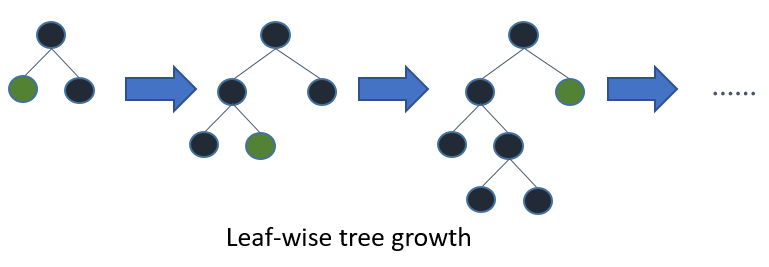

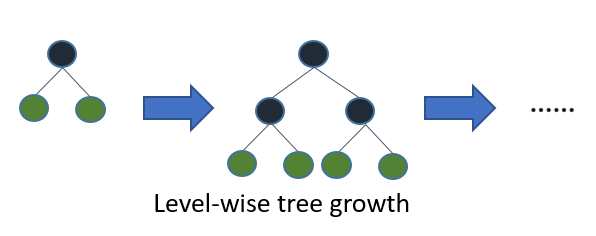

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [84]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 4.6 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [98]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

### Your code is here

LGBM = LGBMClassifier()
#LGBM.fit(X_train, y_train)

search = GridSearchCV(LGBM,
                     param_grid=params,
                     scoring='neg_mean_squared_error',
                     n_jobs=-1)

search.fit(X_train, y_train)


print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

print(f"Качество лучшей модели на финальном тесте: {search.score(X_test, y_test)}")


Best parameter (CV score=-0.12712):
{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
Качество лучшей модели на финальном тесте: -0.115


In [105]:
from sklearn.metrics import classification_report
LGBM = LGBMClassifier(learning_rate=0.01, max_depth=2, n_estimators=100)

In [106]:
LGBM.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, max_depth=2)

In [107]:
print(classification_report(y_test, LGBM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1770
           1       0.00      0.00      0.00       230

    accuracy                           0.89      2000
   macro avg       0.44      0.50      0.47      2000
weighted avg       0.78      0.89      0.83      2000



In [ ]:
params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.01]}